In [175]:
import numpy as np
from matplotlib.pyplot import cm
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import time
from matplotlib.animation import FuncAnimation
from IPython import display
import random
import statistics as stat
from scipy import stats
%run Backend_Retrieval.ipynb
plt.style.use('seaborn-deep')

In [170]:
def find_crit_ind(flow):
    fmax = flow.max()
    optind = 0
    for i in range(len(flow)):
        if flow[i] == fmax:
            optind += i
            break
    return optind

In [171]:
def find_crash_point(flow):
    cpoint = 0
    for i in range(len(flow)):
        if flow[i]==0:
            cpoint+=i
            break
    return cpoint

In [172]:
AccExp = np.load('Data Storage\Varying Acceleration Exponent 7.npy')
StandMod = np.load('Data Storage\Standard Model 1(2D).npy')
mindist = np.load('Data Storage\Varying Min Distance Gap 8.npy')
brakeconst = np.load('Data Storage\Varying Brake Constant 8.npy')
AccMax = np.load('Data Storage\Varying Max Acceleration 8.npy')
MaxVel = np.load('Data Storage\Varying Max Speed 8.npy')

In [207]:
#input array must contain 2 rows, first row flow, second velocity
#each row contains value for each density
#third dimension is the same for itterations over params


def run_analysis(data, start_stop_cars, param_itterated, L, standard_val, standard_model):   #array, list, string, int
    x_dens = np.linspace((start_stop_cars[0]*1000)/L, (start_stop_cars[1]*1000)/L, start_stop_cars[1]-start_stop_cars[0])
    
    critdenlist = []
    critflowlist = []
    freespeed = []
    critspeedlist = []
    crashpointlist = []
    for jj in range(len(data[0,0,:])):
        critdenlist.append(x_dens[find_crit_ind(data[0,:,jj])])
        critflowlist.append(data[0,:,jj].max())
        freespeed.append(data[1,0,jj])
        critspeedlist.append(data[1,find_crit_ind(data[0,:,jj]),jj])
        crashpointlist.append(find_crash_point(data[0,:,jj]))
    
    variances = np.linspace(1/3*(standard_val),3*standard_val,len(data[0,0,:]))
    fundamentalfig2, axs = plt.subplots(2,2)
    c = cm.rainbow(np.linspace(0, 1, len(data[0,0,:])))

    for jj in range(len(data[0,0,:])):
        axs[0,0].plot(x_dens,data[0,:,jj], color = c[jj],label = round(variances[jj],3))
        axs[0,0].plot(critdenlist[jj],critflowlist[jj],marker = 'x',color = 'k', zorder = 3)
        if crashpointlist[jj]!=0:
            axs[0,0].plot(crashpointlist[jj],0, marker = 's', zorder = 4, markeredgewidth=1,markeredgecolor=c[jj],
markerfacecolor='None')
        #axs[0,0].plot(x_dens,data[0,:,jj], color = c[jj],label = round(variances[jj],3))
        legend_elements = [Line2D([0],[0],color = 'k',marker = 's',markeredgewidth=1,markeredgecolor='k',
markerfacecolor='None', label = 'Jam Points'), Line2D([0],[0],color = 'k',marker = 'x',label = 'Peak Flow Point')]
        for ll in range(len(c)):
            legend_elements.append(Line2D([0],[0],color = c[ll],label= round(variances[ll],3)))
        axs[0,0].vlines(critdenlist[jj],0,critflowlist[jj],c[jj],'dashed',linewidth=0.5)
        axs[0,0].hlines(critflowlist[jj],0,critdenlist[jj],c[jj],'dashed',linewidth=0.5)
        axs[0,0].set_ylabel('Global Flow (cars/hr)')
        axs[0,0].legend(handles = legend_elements, loc = (1.2,-0.1),edgecolor = 'k')
        axs[1,0].plot(x_dens,data[1,:,jj], color = c[jj])
        axs[1,0].plot(critdenlist[jj],critspeedlist[jj],marker = 'x',color = 'k', zorder = 3)
        if crashpointlist[jj]!=0:
            axs[1,0].plot(crashpointlist[jj],0, marker = 's', zorder = 4, markeredgewidth=1,markeredgecolor=c[jj],
markerfacecolor='None')
        axs[1,0].vlines(critdenlist[jj],0,critspeedlist[jj],c[jj],'dashed',linewidth=0.5)
        axs[1,0].hlines(critspeedlist[jj],0,critdenlist[jj],c[jj],'dashed',linewidth=0.5)
        axs[1,0].set_xlabel('Global Density (cars/km)')
        axs[1,0].set_ylabel('Average Speed (m/s)')
        axs[1,1].plot(data[0,:,jj], data[1,:,jj], color = c[jj])
        axs[1,1].plot(critflowlist[jj],critspeedlist[jj],marker = 'x',color = 'k', zorder = 2)
        if crashpointlist[jj]!=0:
            axs[1,1].plot(crashpointlist[jj],0, marker = 's', zorder = 4, markeredgewidth=1,markeredgecolor=c[jj],
markerfacecolor='None')
        axs[1,1].vlines(critflowlist[jj],0,critspeedlist[jj],c[jj],'dashed',linewidth=0.5)
        axs[1,1].hlines(critspeedlist[jj],0,critflowlist[jj],c[jj],'dashed',linewidth=0.5)
        axs[1,1].set_xlabel('Global Flow (cars/hr)')
        axs[0,1].axis('off')
        #plt.savefig(f'{param_itterated} FundFigs.png', dpi = 500)
    
    
    special_points_high = []
    special_points_low = []
    #ANALYSIS
    #Crit Flow
    special_points_high.append((max(data[0,:,-1])/max(standard_model[0,:]))*100)
    special_points_low.append((max(data[0,:,0])/max(standard_model[0,:]))*100)
    #Crit dens
    a = find_crit_ind(standard_model[0,:])
    special_points_high.append((critdenlist[-1]/x_dens[a])*100)
    special_points_low.append((critdenlist[0]/x_dens[a])*100)
    #crit vel
    special_points_high.append((critspeedlist[-1]/standard_model[1,a])*100)
    special_points_low.append((critspeedlist[0]/standard_model[1,a])*100)
    #jam point
    if crashpointlist[-1] == 0:
        slope, intercept, r, p, std_err = stats.linregress(x_dens[150:],data[0,150:,-1])
        crashpointlist[-1] = (-intercept/slope)
        print(f'Lin Regressed: Standard Error {std_err}, Predicted Crash {-intercept/slope}')
    if crashpointlist[0] == 0:
        slope, intercept, r, p, std_err = stats.linregress(x_dens[150:],data[0,150:,0])
        crashpointlist[0] = (-intercept/slope)
        print(f'Lin Regressed: Standard Error {std_err}, Predicted Crash {-intercept/slope}')
    special_points_high.append((crashpointlist[-1]/find_crash_point(standard_model[0,:]))*100)
    special_points_low.append((crashpointlist[0]/find_crash_point(standard_model[0,:]))*100)
    
    print('Crit: Flo Den Vel Jam')
    print(special_points_high)
    print(f'Standard Deviation: {stat.stdev(special_points_high)}')
    print(special_points_low)
    print(f'Standard Deviation: {stat.stdev(special_points_low)}')
    print(f'Avg STDV:{(stat.stdev(special_points_high)+stat.stdev(special_points_low))/2} ')


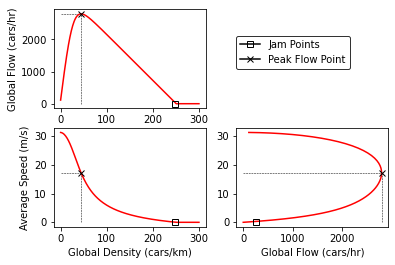

In [231]:
xtot = np.linspace(0,300,299)
y = StandMod[0,:]
avgtot = StandMod[1,:]
crashpointlist = []
for yy in range(len(StandMod[0,:])):
    if StandMod[0,yy] == 0:
        crashpointlist.append(yy)
        break

fundamentalfig, axs = plt.subplots(2,2)
legend_elements = [Line2D([0],[0],color = 'k',marker = 's',markeredgewidth=1,markeredgecolor='k',
markerfacecolor='None', label = 'Jam Points'), Line2D([0],[0],color = 'k',marker = 'x',label = 'Peak Flow Point')]
axs[0,0].legend(handles = legend_elements, loc = (1.2,0.4),edgecolor = 'k')
axs[0,0].plot(xtot,y,color = 'red')
axs[0,0].plot(crashpointlist[0],0, marker = 's', zorder = 4, markeredgewidth=1,markeredgecolor='k',
markerfacecolor='None')
axs[0,0].plot(xtot[find_crit_ind(y)],y[find_crit_ind(y)],marker = 'x',color = 'k', zorder = 3)
axs[0,0].vlines(xtot[find_crit_ind(y)],0,y[find_crit_ind(y)],'k','dashed',linewidth=0.5)
axs[0,0].hlines(y[find_crit_ind(y)],0,xtot[find_crit_ind(y)],'k','dashed',linewidth=0.5)
axs[0,0].set_ylabel('Global Flow (cars/hr)')
axs[1,0].plot(xtot,avgtot,color = 'red')
axs[1,0].plot(crashpointlist[0],0, marker = 's', zorder = 4, markeredgewidth=1,markeredgecolor='k',
markerfacecolor='None')
axs[1,0].plot(xtot[find_crit_ind(y)],avgtot[find_crit_ind(y)],marker = 'x',color = 'k', zorder = 3)
axs[1,0].vlines(xtot[find_crit_ind(y)],0,avgtot[find_crit_ind(y)],'k','dashed',linewidth=0.5)
axs[1,0].hlines(avgtot[find_crit_ind(y)],0,xtot[find_crit_ind(y)],'k','dashed',linewidth=0.5)
axs[1,0].set_xlabel('Global Density (cars/km)')
axs[1,0].set_ylabel('Average Speed (m/s)')
axs[1,1].plot(y,avgtot,color = 'red')
axs[1,1].plot(crashpointlist[0],0, marker = 's', zorder = 4, markeredgewidth=1,markeredgecolor='k',
markerfacecolor='None')
axs[1,1].plot(y[find_crit_ind(y)],avgtot[find_crit_ind(y)],marker = 'x',color = 'k', zorder = 3)
axs[1,1].vlines(y[find_crit_ind(y)],0,avgtot[find_crit_ind(y)],'k','dashed',linewidth=0.5)
axs[1,1].hlines(avgtot[find_crit_ind(y)],0,y[find_crit_ind(y)],'k','dashed',linewidth=0.5)
axs[1,1].set_xlabel('Global Flow (cars/hr)')
axs[0,1].axis('off')
plt.savefig(f'Standard Model FundFigs.png', dpi = 500)

Crit: Flo Den Vel Jam
[113.26131480002898, 55.552252118329115, 203.88289846112707, 100.0]
Standard Deviation: 62.24127069984784
[74.43302089350537, 191.1178831574253, 38.947510932648164, 100.0]
Standard Deviation: 65.00893922813009
Avg STDV:63.62510496398896 


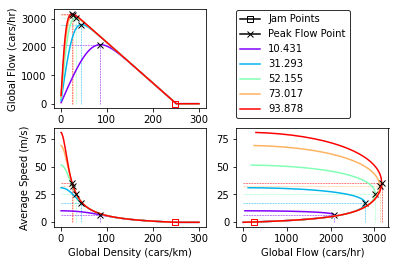

In [208]:
run_analysis(MaxVel,[1,300],'Maximum Velocity', 1000, 31.2928, StandMod)

Crit: Flo Den Vel Jam
[100.00959657789083, 100.0, 100.00959657789082, 100.0]
Standard Deviation: 0.0055405868285671005
[95.5074769660701, 115.5567117585848, 82.66336083486662, 100.0]
Standard Deviation: 13.575924681337584
Avg STDV:6.790732634083076 


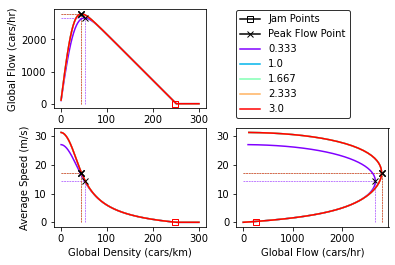

In [209]:
run_analysis(AccMax,[1,300],'Maximum Acceleration', 1000, 1, StandMod)

Lin Regressed: Standard Error 8.741410278368866e-05, Predicted Crash 376.2714391053558
Crit: Flo Den Vel Jam
[84.6297279849448, 77.77612605916457, 108.80965026635758, 49.79919678714859]
Standard Deviation: 24.27761009044579
[106.91109282612187, 113.33432436450126, 94.3333171995193, 151.11302775315494]
Standard Deviation: 24.4360962989329
Avg STDV:24.356853194689343 


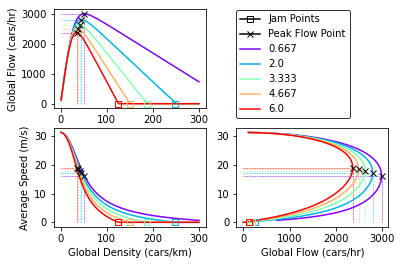

In [210]:
run_analysis(mindist,[1,300],'Minimum Distance',1000, 2,StandMod)

Crit: Flo Den Vel Jam
[100.00586755638348, 100.0, 100.00586755638345, 100.0]
Standard Deviation: 0.0033876352574782674
[100.00586755638349, 100.0, 100.00586755638349, 100.0]
Standard Deviation: 0.003387635257494676
Avg STDV:0.0033876352574864718 


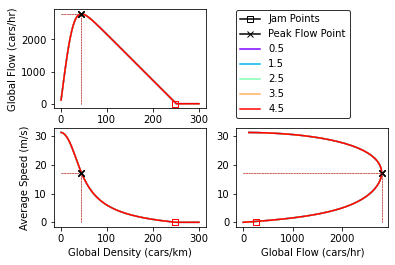

In [211]:
run_analysis(brakeconst,[1,300],'Braking Constant',1000, 1.5,StandMod)

Crit: Flo Den Vel Jam
[108.32677955084576, 82.22090084733165, 131.74878594021783, 100.0]
Standard Deviation: 20.568049091181617
[83.58342025648078, 120.00148654675189, 69.65285021373398, 100.0]
Standard Deviation: 21.690694182333573
Avg STDV:21.129371636757597 


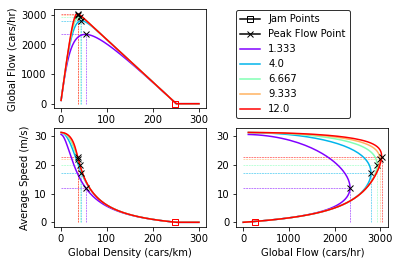

In [212]:
run_analysis(AccExp,[1,300],'Acceleration Exponent',1000, 4,StandMod)